# French Real Estate Data Analysis

## Objective:
#### Now that we have dropped tables with a lot of missing values and taken care of other tables with some missing values, it is time to begin the analytics of the DataSet using visualizations.

## Importing Necessary Libraries

In [1]:
#Importing Data processing Libraries
import numpy as np
import pandas as pd


#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing warnings filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')



#Set Seaborn Style for Matplotlib
sns.set(style='whitegrid', font_scale=1.5)

TARGET = 'Valeur fonciere'

## Loading our Cleaned DataSet

In [2]:
clean_df = pd.read_csv('Cleaned_DataSet.csv')

In [3]:
clean_df.rename( columns={'Unnamed: 0':'Id'}, inplace=True )
clean_df

,Id,No disposition,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Day Mutation,Month Mutation,Year Mutation,Surface Total
0,0,1,Vente,37220.0,26.0,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,...,2.0,Appartement,20.0,1.0,NONE,0.0,4,1,2019,47.27
1,1,1,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,2.0,Appartement,62.0,3.0,NONE,0.0,4,1,2019,414.51
2,2,1,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,3.0,Dépendance,0.0,0.0,NONE,0.0,4,1,2019,7.00
3,3,1,Vente,209000.0,3.0,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,...,1.0,Maison,90.0,4.0,S,940.0,8,1,2019,1030.00
4,4,1,Vente,134900.0,5.0,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,...,1.0,Maison,101.0,5.0,S,490.0,7,1,2019,591.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,55.0,RUE,6513,MONTMARTRE,75002.0,PARIS 02,...,2.0,Appartement,47.0,3.0,NONE,0.0,30,6,2020,216.00
3970053,3970053,1,Vente,1740000.0,104.0,RUE,8073,REAUMUR,75002.0,PARIS 02,...,2.0,Appartement,150.0,5.0,NONE,0.0,26,6,2020,264.00
3970054,3970054,1,Vente,725000.0,16.0,RUE,1797,CHARLEMAGNE,75004.0,PARIS 04,...,2.0,Appartement,48.0,3.0,NONE,0.0,25,6,2020,193.80
3970055,3970055,1,Vente,200000.0,7.0,RUE,1669,CHABANAIS,75002.0,PARIS 02,...,2.0,Appartement,26.0,1.0,NONE,0.0,23,6,2020,98.00


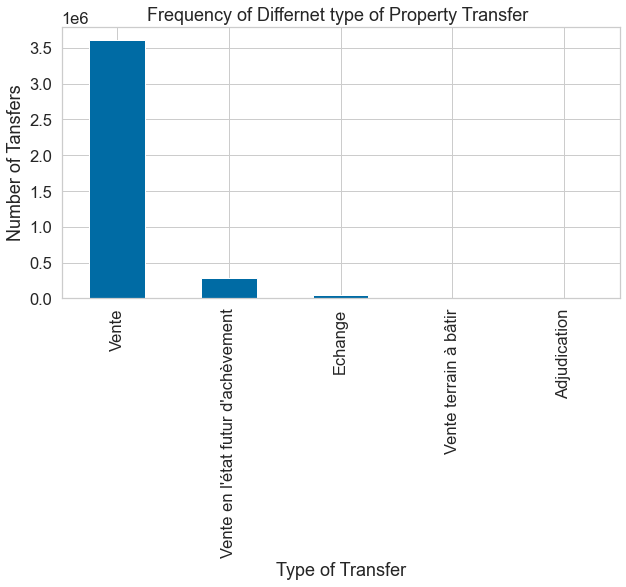

In [8]:
###### Figure 1

plt.figure(figsize = (10,15))
plt.style.use('tableau-colorblind10')
clean_df['Nature mutation'].value_counts().nlargest(5).plot(kind='bar', figsize=(10,5))
plt.title("Frequency of Differnet type of Property Transfer ")
plt.ylabel('Number of Tansfers')
plt.xlabel('Type of Transfer')

plt.savefig('Differnet Types of Transfer.png')


#### We can observe that most of the Transfers were "Vente" or SALES.

#### Moving on, we want to visaulize the Price/M2 over time.
#### We need to do some processing in order to do so.

In [9]:
clean_df['Price_Area'] = clean_df['Valeur fonciere']/clean_df['Surface Total']
clean_df

,Id,No disposition,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Day Mutation,Month Mutation,Year Mutation,Surface Total,Price_Area
0,0,1,Vente,37220.0,26.0,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,...,Appartement,20.0,1.0,NONE,0.0,4,1,2019,47.27,787.391580
1,1,1,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,Appartement,62.0,3.0,NONE,0.0,4,1,2019,414.51,446.551350
2,2,1,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,Dépendance,0.0,0.0,NONE,0.0,4,1,2019,7.00,26442.857143
3,3,1,Vente,209000.0,3.0,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,...,Maison,90.0,4.0,S,940.0,8,1,2019,1030.00,202.912621
4,4,1,Vente,134900.0,5.0,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,...,Maison,101.0,5.0,S,490.0,7,1,2019,591.00,228.257191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,55.0,RUE,6513,MONTMARTRE,75002.0,PARIS 02,...,Appartement,47.0,3.0,NONE,0.0,30,6,2020,216.00,2407.407407
3970053,3970053,1,Vente,1740000.0,104.0,RUE,8073,REAUMUR,75002.0,PARIS 02,...,Appartement,150.0,5.0,NONE,0.0,26,6,2020,264.00,6590.909091
3970054,3970054,1,Vente,725000.0,16.0,RUE,1797,CHARLEMAGNE,75004.0,PARIS 04,...,Appartement,48.0,3.0,NONE,0.0,25,6,2020,193.80,3740.970072
3970055,3970055,1,Vente,200000.0,7.0,RUE,1669,CHABANAIS,75002.0,PARIS 02,...,Appartement,26.0,1.0,NONE,0.0,23,6,2020,98.00,2040.816327


In [11]:
clean_df['Datetime'] = pd.to_datetime(clean_df[['Day Mutation','Month Mutation','Year Mutation']]
                   .astype(str).apply(' '.join, 1), format='%d %m %Y')


In [13]:
clean_df['Datetime']

0         2019-01-04
1         2019-01-04
2         2019-01-04
3         2019-01-08
4         2019-01-07
             ...    
3970052   2020-06-30
3970053   2020-06-26
3970054   2020-06-25
3970055   2020-06-23
3970056   2020-06-11
Name: Datetime, Length: 3970057, dtype: datetime64[ns]

#### First of all we analyse, how specific date of the year affect the amount of Property Transfers throughout the year.

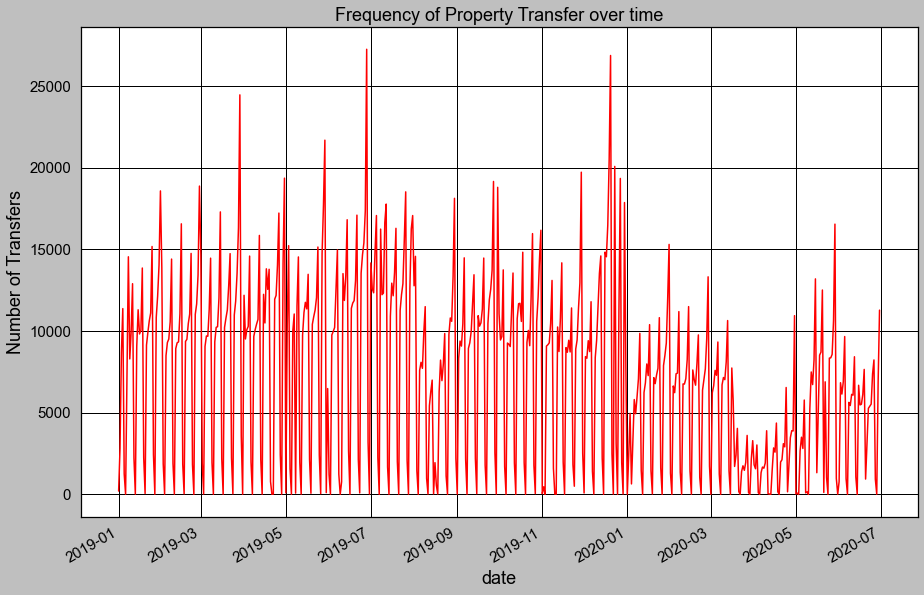

In [14]:
#Figure 2
plt.style.use('grayscale')
clean_df['Datetime'].sort_values().value_counts().plot(kind='line', figsize=(15,10),fontsize=15,color='red')
plt.title("Frequency of Property Transfer over time")
plt.ylabel('Number of Transfers')
plt.xlabel('date')
plt.savefig('Frequency of Transfers.png',bbox_inches='tight')


#### This shows that the frequency of Property Transfers fluctuate over time. It increased around the July-August of 2019 and later that the turn of the year 2019 to the begining of 2020.

#### Now, we visualize the Price per m2 over the year 2019-2020.

<Figure size 1440x1440 with 0 Axes>

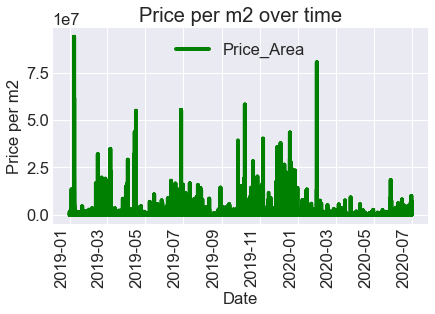

In [32]:
#Figure 3
plt.figure(figsize = (20,20))
plt.style.use('seaborn-bright')
clean_df.plot(x='Datetime',y='Price_Area',color='green')
plt.xlabel('Date')
plt.ylabel('Price per m2')
plt.title('Price per m2 over time')
plt.xticks(rotation = 90)
plt.savefig('Price Area.png',bbox_inches = 'tight')

#### The plot shows us that the price per m2 spiked at the begining of 2019 and later again at the begining of 2020. 
#### We can infer that the the price per m2 tends to spike at the turn of the year (December-January).

<Figure size 1440x1440 with 0 Axes>

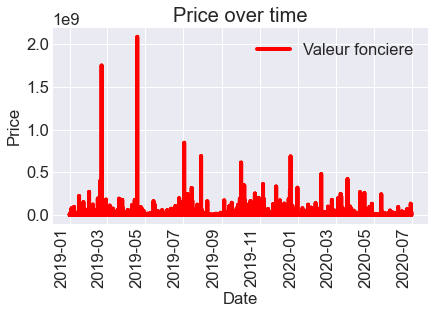

In [33]:
#Figure 4
plt.figure(figsize = (20,20))
plt.style.use('seaborn-bright')
clean_df.plot(x='Datetime',y='Valeur fonciere',color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over time')
plt.xticks(rotation = 90)
plt.savefig('Price.png',bbox_inches = 'tight')

#### The plot show that the Price of Properties surged around the March of 2019-  May 2019.
#### This coincides with the timing of start of confinement due to Covid-19.

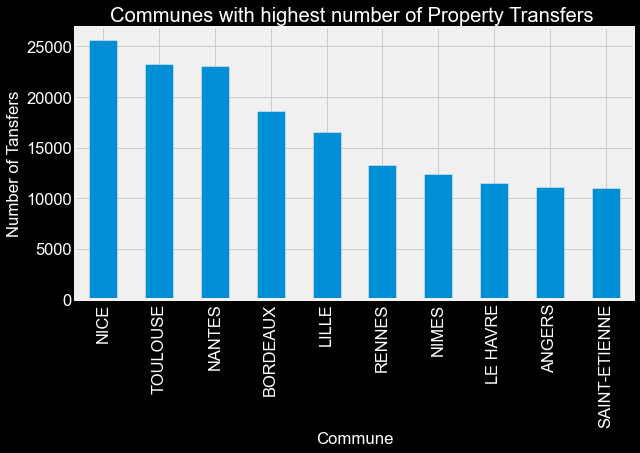

In [28]:
#Figure 5

plt.figure(figsize = (10,15))
plt.style.use('fivethirtyeight')


clean_df['Commune'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Communes with highest number of Property Transfers ")
plt.ylabel('Number of Tansfers')
plt.xlabel('Commune')

plt.savefig('Commune Transfer.png')

#### The plot show the Top cities of France with the highest amount of transfers occuring in Nice, Toulouse and Nantes respectively. The Real-Estate market seems to be booming in those cities.

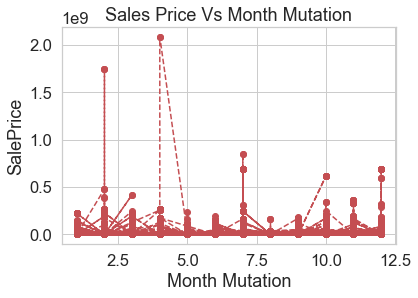

In [19]:
#Figure 6
sns.set_style("whitegrid")
plt.plot(clean_df['Month Mutation'], clean_df['Valeur fonciere'],marker='o', linestyle='--', color='r',label='Month')

plt.xlabel('Month Mutation')
plt.ylabel('SalePrice')
plt.title('Sales Price Vs Month Mutation')
plt.show()

#### The plot above shows confirms that the Property prices surged over the months of March-May.

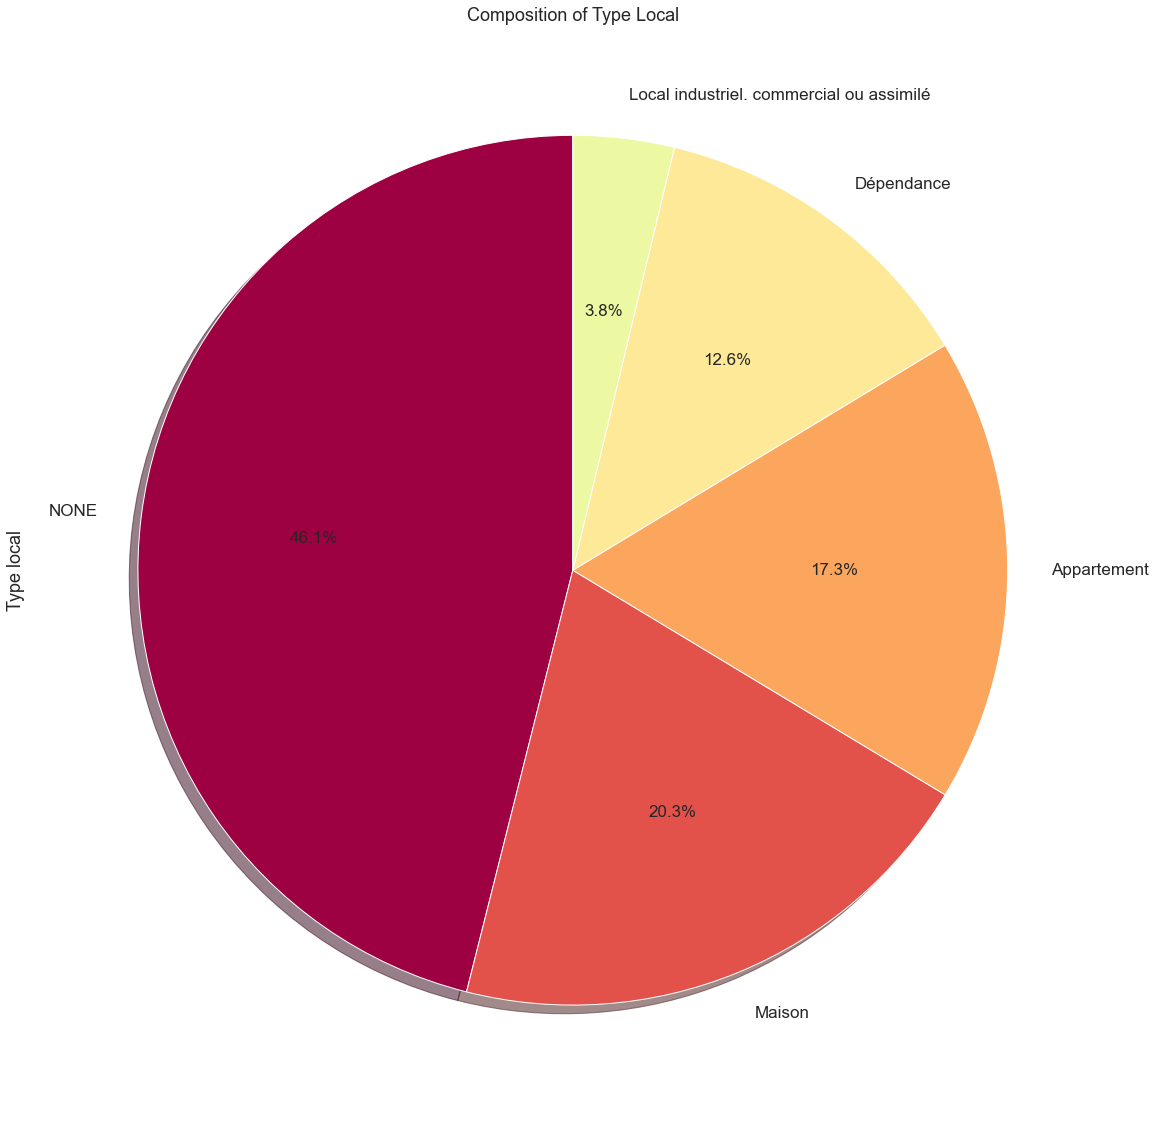

In [23]:
#Figure 7
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
clean_df['Type local'].value_counts().nlargest(10).plot(kind='pie', figsize=(25,20)
                                                                        ,autopct='%1.1f%%',
                                                                        startangle=90,shadow=True,
                                                                        fontsize=17,colors=colors)
plt.title('Composition of Type Local')
plt.savefig("Type Local.png",bbox_inches='tight')

#### The pie-chart above shows the composition of the type of allocation of our 2019-2020 French Real Estate Dataset.
#### We can infer that most of the property transfers were Land as 46.1% of total Property Transfers didnot have any kind of buildings in them. 
#### Of the ones that included buildings, most of them were Houses or "Maison"(20.3%) followed by Appartements (17.3%).